# Processing Male Population



## Reading data input

Reading ouput of the data generate by ProcessingCensus2016.ipynb and creating a dataFrame **df**.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
df = pd.read_csv('data/CensusLocalAreaProfiles2016_cleaned.csv', encoding='ISO-8859-1')


---

## Selecting data of interest and creating a new dataFrame **df1** (male population)

Selecting rows 30 to 33 and columns 0 to 24 (male population between 5 years old and 19 years old data set) by calling iloc function in the data frame created. 

In [29]:
df1 = df.iloc[29:33, 0:24]

In [30]:
df1.to_csv('data/df11.csv')

---

## Checking the dimensions of the new dataFrame **df1**

In [31]:
df1.shape

(4, 24)

In [32]:
df1.to_csv('data/df1.csv')

**df1** has 4 rows and 24 columns.

---

## Checking the apperance of the new dataFrame created

In [33]:
df1.head()

,ID,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
29,30,5 to 9 years,345,575,645,405,530,780,1240,285,...,250,1080,585,195,195,175,915,640,280,335
30,31,10 to 14 years,475,425,840,280,470,785,1100,440,...,315,1110,565,250,200,170,1075,760,215,400
31,32,15 to 64 years,4460,27465,6790,11430,10985,11815,17260,4315,...,3930,18360,7545,2510,2600,4910,12520,10120,20300,4065
32,33,15 to 19 years,650,605,930,300,435,890,1340,535,...,415,1455,545,290,195,195,1295,955,285,465


Analyzing the dataFrame **df1** above, it can be seen that the row with **Variable** "15 to 64 years" shows information repeated. The row should be deleted.

---

## Creating a new dataFrame **df2** without rows and columns not needed.

Deleting row with **Variable** "15 to 64 years" and column ID.

In [34]:
df2 = df1.drop(index=31, columns='ID')

In [35]:
df2.head()

,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
29,5 to 9 years,345,575,645,405,530,780,1240,285,745,...,250,1080,585,195,195,175,915,640,280,335
30,10 to 14 years,475,425,840,280,470,785,1100,440,765,...,315,1110,565,250,200,170,1075,760,215,400
32,15 to 19 years,650,605,930,300,435,890,1340,535,900,...,415,1455,545,290,195,195,1295,955,285,465


---

## Resetting index of rows  

The new index gives again a sequential number in each row.  

In [36]:
df2.reset_index(drop=True)

,Variable,Arbutus-Ridge,Downtown,Dunbar-Southlands,Fairview,Grandview-Woodland,Hastings-Sunrise,Kensington-Cedar Cottage,Kerrisdale,Killarney,...,Oakridge,Renfrew-Collingwood,Riley Park,Shaughnessy,South Cambie,Strathcona,Sunset,Victoria-Fraserview,West End,West Point Grey
0,5 to 9 years,345,575,645,405,530,780,1240,285,745,...,250,1080,585,195,195,175,915,640,280,335
1,10 to 14 years,475,425,840,280,470,785,1100,440,765,...,315,1110,565,250,200,170,1075,760,215,400
2,15 to 19 years,650,605,930,300,435,890,1340,535,900,...,415,1455,545,290,195,195,1295,955,285,465


---

## Data set visual QC,to detect errors, missing values, anomalies,etc

Plotting datasets requering numeric datatypes.

### Checking variable data types of **df2**

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 29 to 32
Data columns (total 23 columns):
Variable                    3 non-null object
Arbutus-Ridge               3 non-null object
Downtown                    3 non-null object
Dunbar-Southlands           3 non-null object
Fairview                    3 non-null object
Grandview-Woodland          3 non-null object
Hastings-Sunrise            3 non-null object
Kensington-Cedar Cottage    3 non-null object
Kerrisdale                  3 non-null object
Killarney                   3 non-null object
Kitsilano                   3 non-null object
Marpole                     3 non-null object
Mount Pleasant              3 non-null object
Oakridge                    3 non-null object
Renfrew-Collingwood         3 non-null object
Riley Park                  3 non-null object
Shaughnessy                 3 non-null object
South Cambie                3 non-null object
Strathcona                  3 non-null object
Sunset                 

To plot the dataset, numeric values should change data type from object to numeric with the following expression in each column:

**df["column name"] = pd.to_numeric(df["column name"])**

It could be repetitive and tedius if copy and paste manually each column name.Let's automatize this process:

### changing data types

**First step:** Identifying the columns

In [38]:
df2.columns

Index(['Variable', 'Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands',
       'Fairview', 'Grandview-Woodland', 'Hastings-Sunrise',
       'Kensington-Cedar Cottage', 'Kerrisdale', 'Killarney', 'Kitsilano',
       'Marpole', 'Mount Pleasant', 'Oakridge', 'Renfrew-Collingwood',
       'Riley Park', 'Shaughnessy', 'South Cambie', 'Strathcona', 'Sunset',
       'Victoria-Fraserview', 'West End', 'West Point Grey'],
      dtype='object')

**Second step:** Creating a column and a new dataFrame(df3) with all index of df2.

In [39]:
df3 = pd.DataFrame({'zones':['Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands',
       'Fairview', 'Grandview-Woodland', 'Hastings-Sunrise',
       'Kensington-Cedar Cottage', 'Kerrisdale', 'Killarney', 'Kitsilano',
       'Marpole', 'Mount Pleasant', 'Oakridge', 'Renfrew-Collingwood',
       'Riley Park', 'Shaughnessy', 'South Cambie', 'Strathcona', 'Sunset',
       'Victoria-Fraserview', 'West End', 'West Point Grey']}) 

In [40]:
df3.head()

,zones
0,Arbutus-Ridge
1,Downtown
2,Dunbar-Southlands
3,Fairview
4,Grandview-Woodland


**Third step:** With a for loop, let's change the datatype to numeric for each zone.

In [41]:
for index, row in df3.iterrows():
    df2[row["zones"]] = pd.to_numeric(df2[row["zones"]])

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 29 to 32
Data columns (total 23 columns):
Variable                    3 non-null object
Arbutus-Ridge               3 non-null int64
Downtown                    3 non-null int64
Dunbar-Southlands           3 non-null int64
Fairview                    3 non-null int64
Grandview-Woodland          3 non-null int64
Hastings-Sunrise            3 non-null int64
Kensington-Cedar Cottage    3 non-null int64
Kerrisdale                  3 non-null int64
Killarney                   3 non-null int64
Kitsilano                   3 non-null int64
Marpole                     3 non-null int64
Mount Pleasant              3 non-null int64
Oakridge                    3 non-null int64
Renfrew-Collingwood         3 non-null int64
Riley Park                  3 non-null int64
Shaughnessy                 3 non-null int64
South Cambie                3 non-null int64
Strathcona                  3 non-null int64
Sunset                      3 non-null in

Now, all columns in the dataFrame df2(Exept the column **Variable**) have numeric dataType

### Plotting 

The following expression it will be used to plot each range of male population in each planning zone. 

**df2.plot(kind='bar',x='Variable',y='zones',color='green')
plt.show()**

With a for loop, let's plot in bar graphs of the male population data. 

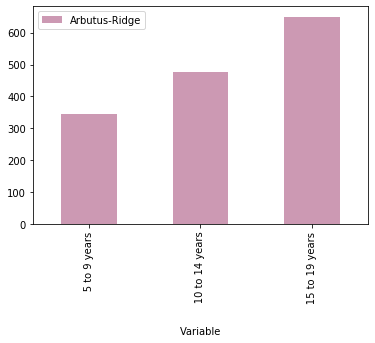

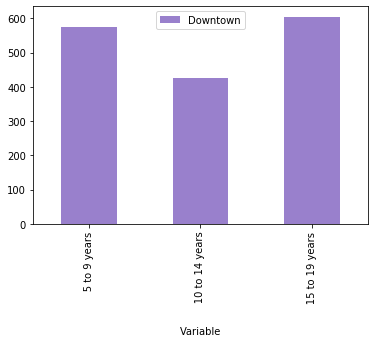

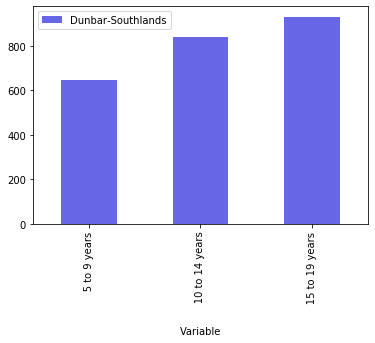

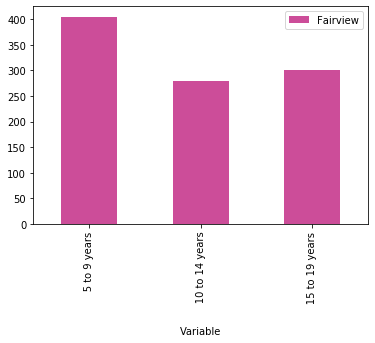

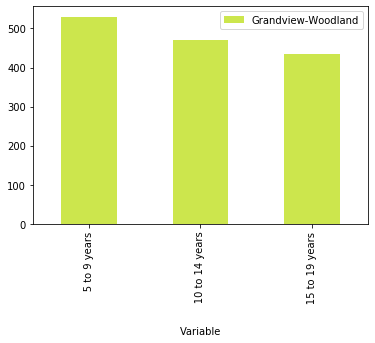

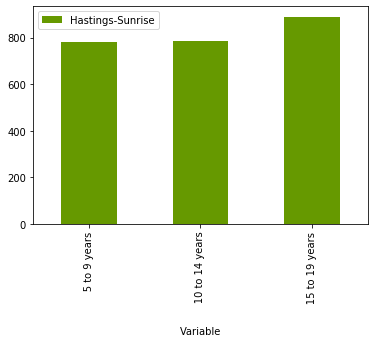

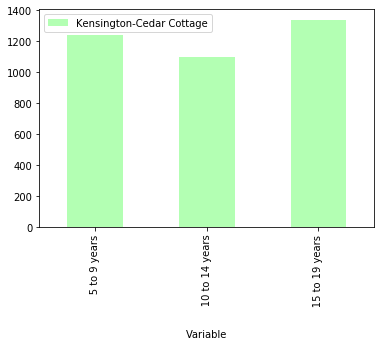

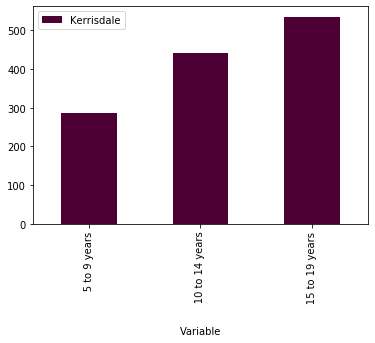

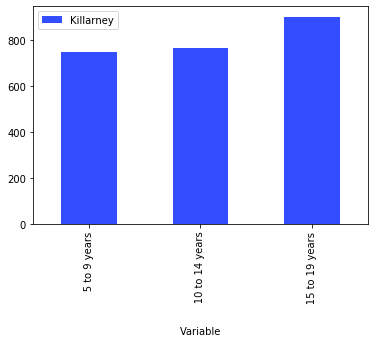

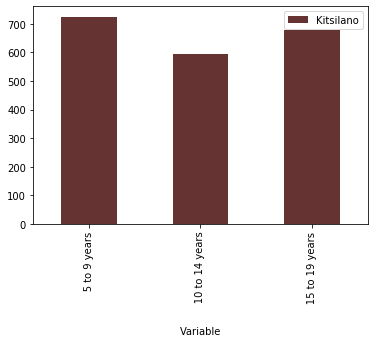

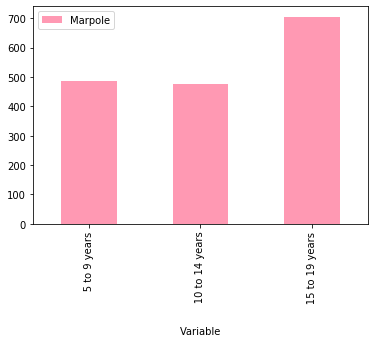

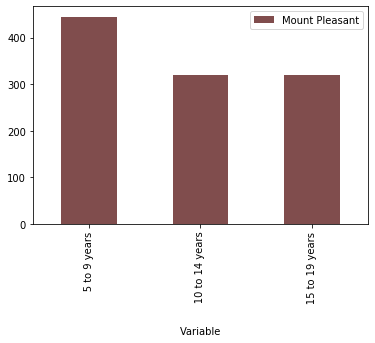

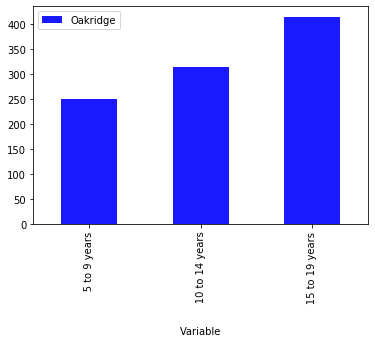

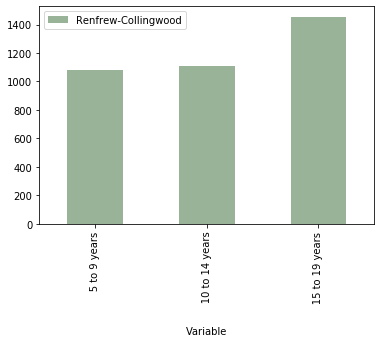

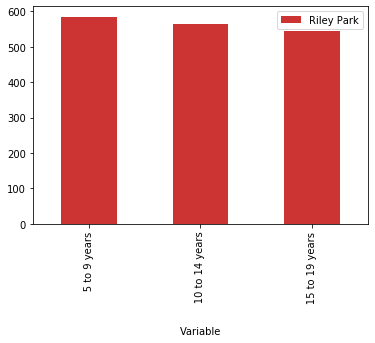

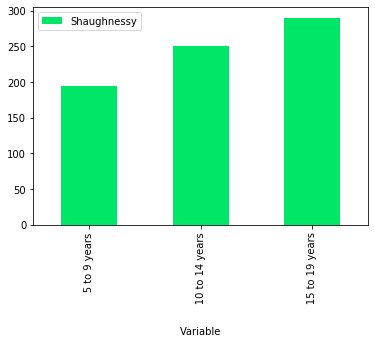

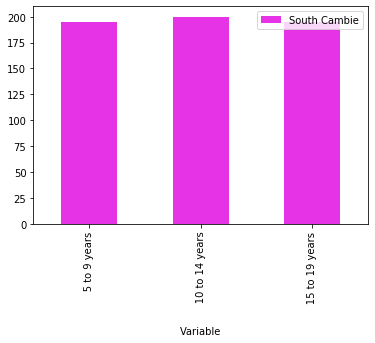

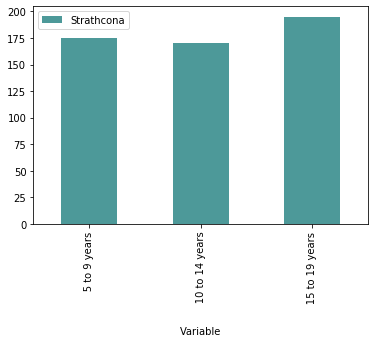

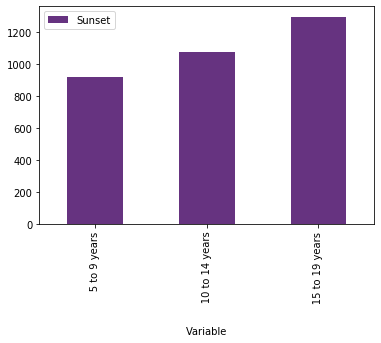

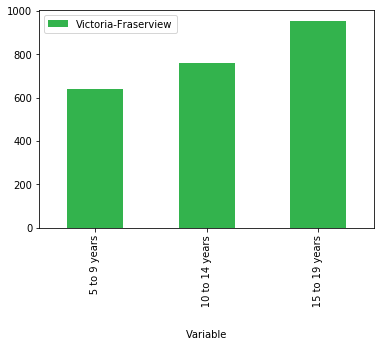

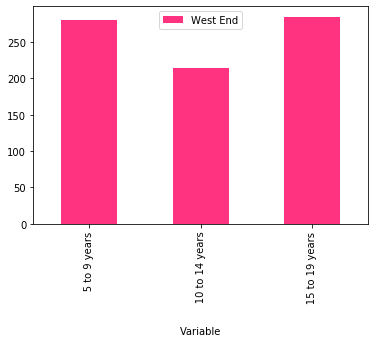

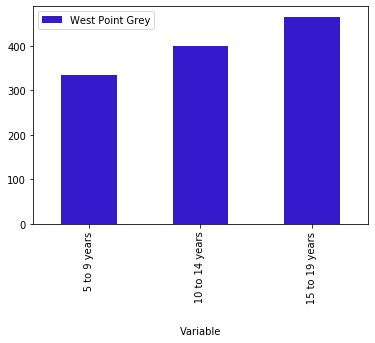

In [43]:
for index, row in df3.iterrows():
    df2.plot(kind='bar',x='Variable',y=row["zones"],color=(round(random.uniform(0,1),1),round(random.uniform(0,1),1),round(random.uniform(0,1),1)))
    plt.show()

## Data conditioning to be included in a shapefile

To visualize the male population in the final map, this dataFrame df2 will be included in a shapefile.

**First step:** Transpose dataframe df2

In [44]:
df2.columns

Index(['Variable', 'Arbutus-Ridge', 'Downtown', 'Dunbar-Southlands',
       'Fairview', 'Grandview-Woodland', 'Hastings-Sunrise',
       'Kensington-Cedar Cottage', 'Kerrisdale', 'Killarney', 'Kitsilano',
       'Marpole', 'Mount Pleasant', 'Oakridge', 'Renfrew-Collingwood',
       'Riley Park', 'Shaughnessy', 'South Cambie', 'Strathcona', 'Sunset',
       'Victoria-Fraserview', 'West End', 'West Point Grey'],
      dtype='object')

In [45]:
df2_transpose = df2.T

**Second step:** Reset index.

In [46]:
new_index = ['Sunset', 'Mount Pleasant', 'Riley Park', 'Downtown','Kitsilano', 'Dunbar-Southlands', 'Kerrisdale', 'Arbutus-Ridge', 
             'West Point Grey', 'Marpole', 'Oakridge', 'Shaughnessy', 'Fairview', 'South Cambie', 'West End', 'Killarney', 'Renfrew-Collingwood',
             'Hastings-Sunrise', 'Victoria-Fraserview', 'Kensington-Cedar Cottage', 'Strathcona', 'Grandview-Woodland'
             ]

In [47]:
df4 = df2_transpose.reindex(new_index)

In [50]:
df4.to_csv('data/df4.csv')

**Third step:** Rename columns name.

In [51]:
df5 = df4.rename(columns={29: "5 to 9 years", 30 : "10 to 14 years", 32 : "15 to 19 years"})

## Writing data (output)

In [52]:
df5.to_csv('data/MalePopulationDataset_cleaned.csv')